<a href="https://colab.research.google.com/github/Ariazoox/Flight-Price-Prediction-ML/blob/main/Projet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Sujet


Project Phase 1 Submission (Nov 28) Devoir

Submit your intermediate project solution, which must include:

    Data Exploratory Analysis & Unsupervised Exploration
    Data preprocessing, preparation & train-val-test splits
    Baseline results with basic Linear & Ensemble Models



## Projet

In [104]:
import pandas as pd

dataset = pd.read_csv("https://raw.githubusercontent.com/Ariazoox/Flight-Price-Prediction-ML/main/Clean_Dataset.csv")

## 1 - Exploration de la donnée

In [105]:
dataset.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [106]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [107]:
dataset.describe()

,Unnamed: 0,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


In [108]:
dataset["airline"].value_counts()

,count
airline,
Vistara,127859
Air_India,80892
Indigo,43120
GO_FIRST,23173
AirAsia,16098
SpiceJet,9011


## 2 - Préprocessing

### 2 - 1 Séparation des features et des réponses

In [109]:
feature_names = [
    "airline",
    "flight",
    "source_city",
    "departure_time",
    "stops",
    "arrival_time",
    "destination_city",
    "class",
    "duration",
    "days_left"
]

target_name = "price"

dataset = dataset[feature_names + [target_name]]
data, target = dataset[feature_names], dataset[target_name]

### 2 - 2 Création d'un test set

In [110]:
from sklearn.model_selection import train_test_split

data_train, data_test, target_train, target_test = train_test_split(
    data, target, test_size=0.2, random_state=42
)


### 2 - 3 Gestion des textes et des features catégoriel

Dans ce dataset les features catégoriel sont: "airline", "source_city", "departure_time", "arrival_time", "destination_city", "class".

Les variables ordinal (peuvent être ordonné) sont: "class", "departure_time", "arrival_time",

In [111]:
ordinal_columns=[
    "class",
    "departure_time",
    "arrival_time"
]

data_ordinal_test = data_test[ordinal_columns]
data_ordinal_train = data_train[ordinal_columns]

In [112]:
numerical_features = [
    "duration",
    "days_left"
]

data_num_test = data_test[numerical_features]
data_num_train = data_train[numerical_features]

### 2 - 4 Création d'une pipeline de preprocessing

#### 2 - 4 - 1 Linear Regression

In [113]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate

pipeline_linear_regression = Pipeline([
    ("imputer", SimpleImputer(strategy="median")), ## Gestion des données manquantes (meme si le dataset ne semble pas en avoir)
    ("scaler", StandardScaler()), ## Scaling
    ("model", LinearRegression()),
])

fit_linear_regression = pipeline_linear_regression.fit(data_num_train, target_train)
score_linear_regression = fit_linear_regression.score(data_num_train, target_train)
val_linear_regression = cross_validate(pipeline_linear_regression, data_num_test, target_test, cv=10)
print(score_linear_regression, val_linear_regression)

0.0483493216849894 {'fit_time': array([0.02952886, 0.02638292, 0.02780795, 0.02294731, 0.01906657,
       0.01855898, 0.01901221, 0.01875544, 0.01906061, 0.02238131]), 'score_time': array([0.00424838, 0.00468373, 0.00412869, 0.00318766, 0.0032661 ,
       0.00324988, 0.00322723, 0.0032227 , 0.00339055, 0.00353718]), 'test_score': array([0.05267934, 0.04825847, 0.05011538, 0.05811278, 0.05408778,
       0.04107405, 0.05084409, 0.05741062, 0.04353905, 0.04713252])}


Ici score très bas car on évalue sur très peu de données, probablement peu lié à ce qui nous intéresse

### 2 - 4 - 2 Linear Regression avec OrdinalEncoder

On va donc essayer de transformer les colonnes catégoriels avec OrdinalEncoder, tout en gardant l'utilisation de Linear Regression (voir tp wrap up quiz decision trees)

In [114]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer

object_columns=data_train.select_dtypes("object").columns

pipeline_num = Pipeline([
    ("imputer", SimpleImputer(strategy="median")), ## Déjà utiliser au dessus, remplace les valeurs manquantes par la médiane
])

pipeline_cat = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")), ## Remplace les valeurs manquantes en utilisant les plus fréquentes à travers les colonnes
    ("encoder", OrdinalEncoder(unknown_value=-1, handle_unknown="use_encoded_value")), ## Va mettre à -1 (la valeur de unknown_value) les vlauers encodé des catégories inconnues
])


preprocessor = ColumnTransformer(
    transformers=[
        ("num", pipeline_num, numerical_features),
        ("cat", pipeline_cat, object_columns),
    ]
)


pipeline_linear_regression_ordinal_encoder = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", LinearRegression())
])

result_linear_regression_1 = cross_validate(pipeline_linear_regression_ordinal_encoder, data_train, target_train, cv=10)
pipeline_linear_regression_ordinal_encoder.fit(data_train, target_train)
test_score = pipeline_linear_regression_ordinal_encoder.score(data_test, target_test)
print(test_score)

0.9045747367508341


Affichage (à reprendre)

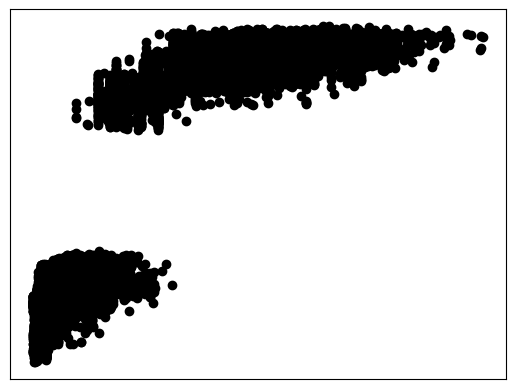

In [115]:
import matplotlib.pyplot as plt

pred = pipeline_linear_regression_ordinal_encoder.predict(data_test)
plt.scatter(target_test, pred, color="black")
plt.xticks(())
plt.yticks(())

plt.show()

Score beaucoup trop haut, on utilise des colonnes qu'on ne devrais pas utiliser

In [116]:
pipeline_num = Pipeline([
    ("imputer", SimpleImputer(strategy="median")), ## Déjà utiliser au dessus, remplace les valeurs manquantes par la médiane
])

pipeline_cat = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")), ## Remplace les valeurs manquantes en utilisant les plus fréquentes à travers les colonnes
    ("encoder", OrdinalEncoder(unknown_value=-1, handle_unknown="use_encoded_value")), ## Va mettre à -1 (la valeur de unknown_value) les vlauers encodé des catégories inconnues
])


preprocessor = ColumnTransformer(
    transformers=[
        ("num", pipeline_num, numerical_features),
        ("cat", pipeline_cat, ordinal_columns),
    ]
)


pipeline_linear_regression_ordinal_encoder = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", LinearRegression())
])

result_linear_regression_2 = cross_validate(pipeline_linear_regression_ordinal_encoder, data_train, target_train, cv=10)
pipeline_linear_regression_ordinal_encoder.fit(data_train, target_train)
test_score = pipeline_linear_regression_ordinal_encoder.score(data_test, target_test)
print(test_score)

0.8916493788062376


Affichage (à reprendre)

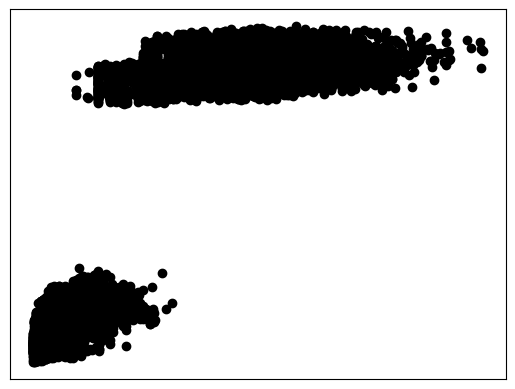

In [117]:
pred = pipeline_linear_regression_ordinal_encoder.predict(data_test)
plt.scatter(target_test, pred, color="black")
plt.xticks(())
plt.yticks(())

plt.show()